# Reverberador de Schroeder

En el presente notebook se desarrolla la implementación de un Reverberador de Schroeder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
import scipy.signal as sig
from utilfunc import *    # Funciones básicas

Matplotlib is building the font cache; this may take a moment.


## IIR COMB FILTER
El filtro peine de respuesta al impulso infinita emula un modo del recinto que se quiere emular. Su diagrama en bloques es:
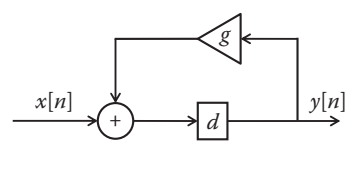
<!-- ![image-2.png](attachment:image-2.png) -->
y su función transferencia por lo tanto es:
$$ H(z) = \frac{z^{-D}}{1-g\ z^{-D}} $$
donde $D$ es el retraso en muestras y $g$ la ganancia. 

Por ejemplo, para un retraso de 10 muestras y una ganancia de 0.7 se tiene:

Ceros: []
Polos: [-0.90318+0.32873j -0.90318-0.32873j -0.48057+0.83238j -0.48057-0.83238j
  0.1669 +0.94654j  0.1669 -0.94654j  0.96114+0.j       0.73628+0.61781j
  0.73628-0.61781j]


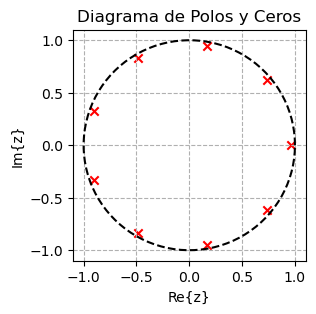

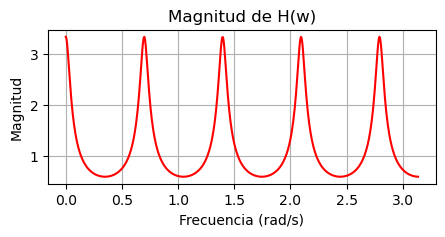

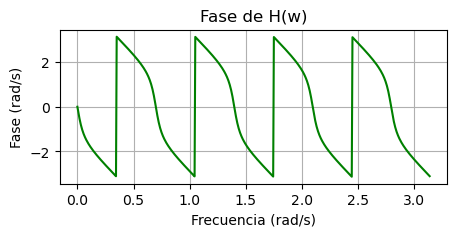

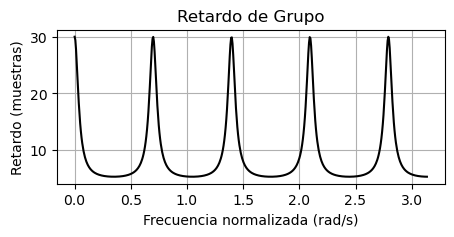

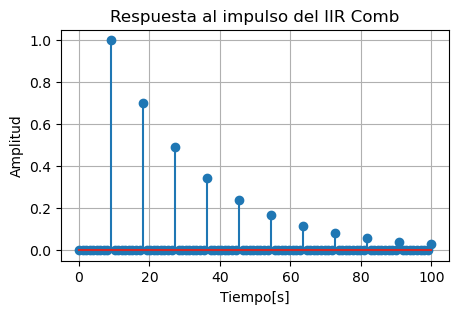

In [3]:
delay = 10
gain = 0.7
b = np.zeros(delay)    # Se crea el vector de coeficientes
b[-1] = 1    # Se asignan los coeficientes no nulos
a = np.zeros(delay)
a[0] = 1
a[-1] = -gain

polosyceros(b,a,s=3)     # Devuevle valores y grafica polos y ceros en el plano z

w, H = sig.freqz(b, a)
plot_magyfas(w, H, l=5, a=2)     # Grafica la magnitud y la fase del sistema

w, GD_comb = sig.group_delay((b,a))    # Se obtiene el retardo de grupo y se grafica
plt.figure(figsize=(5,2))
plt.plot(w, GD_comb, 'k')
plt.title('Retardo de Grupo')
plt.xlabel('Frecuencia normalizada (rad/s)')
plt.ylabel('Retardo (muestras)')
plt.grid()
plt.show()

impulso = np.zeros(100)
impulso[0] = 1
h = sig.lfilter(b, a, impulso)     # Se obtiene la respuesta al impulso

plot_sig(h[:], title='Respuesta al impulso del IIR Comb', l=5,a=3, tipo='stem')    # Grafica una señal temporal

# FILTRO PASA TODO
Un filtro pasa todo se obtiene modificando el filtro peine de respuesta al impulso infinita, y tiene la particularidad de que la magnitud de su respuesta en frecuencia es constante.
El diagrama en bloques de este tipo de filtros es:
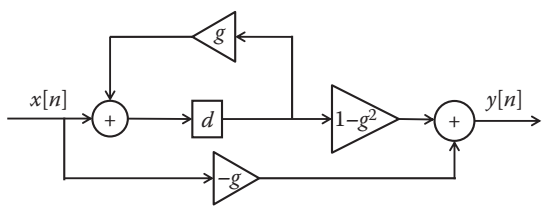
y su función transferencia: 
$$ H(z) = \frac{g + z^{-D}}{1 + g\ z^{-D}} $$
donde nuevamente $D$ es el retraso en muestras y $g$ la ganancia. 
Para $D = 10$ y $g = 0.7$ se tiene:

Ceros: [-1.04043+0.j      -0.79701+0.66877j -0.79701-0.66877j -0.18067+1.02462j
 -0.18067-1.02462j  0.52021+0.90104j  0.52021-0.90104j  0.97768+0.35585j
  0.97768-0.35585j]
Polos: [-0.96114+0.j      -0.73628+0.61781j -0.73628-0.61781j -0.1669 +0.94654j
 -0.1669 -0.94654j  0.48057+0.83238j  0.48057-0.83238j  0.90318+0.32873j
  0.90318-0.32873j]


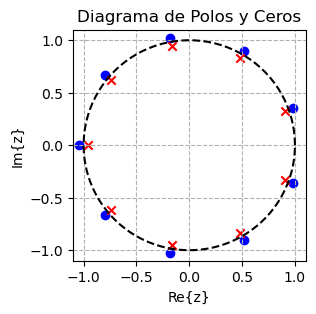

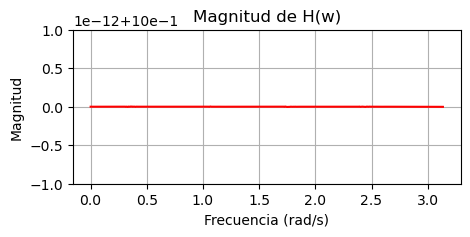

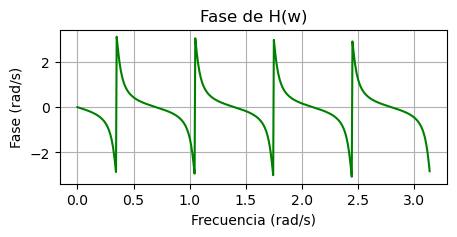

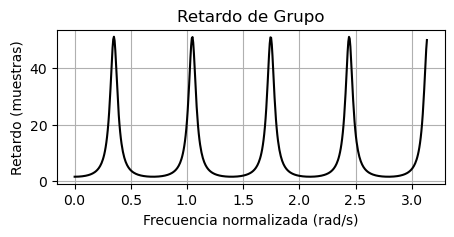

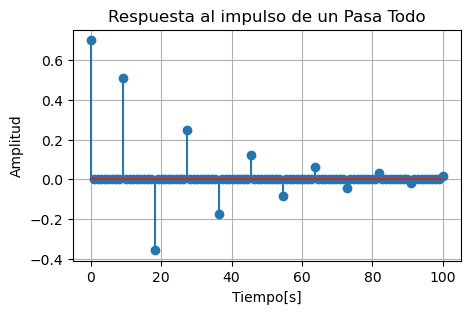

In [5]:
delay = 10
gain = 0.7
b = np.zeros(delay)
b[0] = gain
b[-1] = 1
a = np.zeros(delay)
a[0] = 1
a[-1] = gain

polosyceros(b, a, s=3)

w, H = sig.freqz(b, a)
plot_magyfas(w, H, l=5, a=2)

w, GD_ap = sig.group_delay((b,a))
plt.figure(figsize=(5,2))
plt.plot(w, GD_ap, 'k')
plt.title('Retardo de Grupo')
plt.xlabel('Frecuencia normalizada (rad/s)')
plt.ylabel('Retardo (muestras)')
plt.grid()
plt.show()

h = sig.lfilter(b, a, impulso)
plot_sig(h[:], title='Respuesta al impulso de un Pasa Todo', l=5, a=3, tipo='stem')

Se aprecia como cada polo, ubicado dentro de la circunferencia unidad, tiene su cero en el valor inverso, fuera de la circunferencia. Esto es característico de los filtros pasa todo y es lo que permite obtener una magnitud plana en su respuesta en frecuencia. 

#### Comparación de retardo de grupo

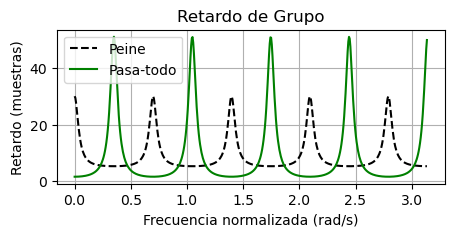

In [6]:
plt.figure(figsize=(5,2))
plt.plot(w, GD_comb, '--k', label='Peine')
plt.plot(w, GD_ap, 'g', label='Pasa-todo')
plt.title('Retardo de Grupo')
plt.xlabel('Frecuencia normalizada (rad/s)')
plt.ylabel('Retardo (muestras)')
plt.grid()
plt.legend()
plt.show()

In [7]:
def iircomb(x, delay, gain):
    '''
    Filtra una señal con un filtro Comb de respuesta infinita.
    
    '''
    b = np.zeros(delay)
    b[-1] = 1
    a = np.zeros(delay)
    a[0] = 1
    a[-1] = -gain
    return sig.lfilter(b, a, x)

def allpass(x, delay, gain):
    '''
    Filtra una señal con un pasa todo.
    '''
    b = np.zeros(delay)
    b[0] = gain
    b[-1] = 1
    a = np.zeros(delay)
    a[0] = 1
    a[-1] = gain
    return sig.lfilter(b, a, x)

La señal utilizada para testar las distintas implementaciones es un sample de tambor.

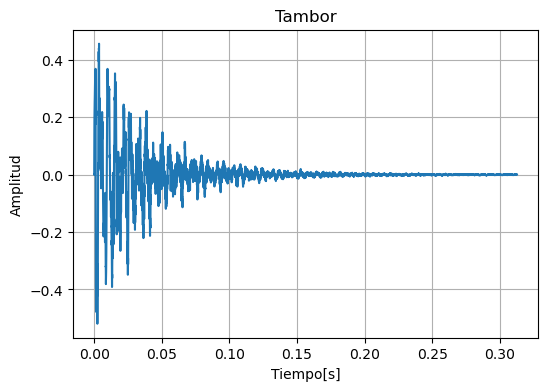

In [8]:
snare, fs = sf.read('snare.wav') # Lee un tambor
# snare = snare[:44100]
plot_sig(snare[:15000], fs, title='Tambor', l=6, a=4)
ipd.Audio(snare, rate=fs)

## Filtro peine IIR
A continuación se obtiene el sonido de tambor filtrado con un filtro peine IIR con un retraso de 45 ms y una ganancia de 0,7.

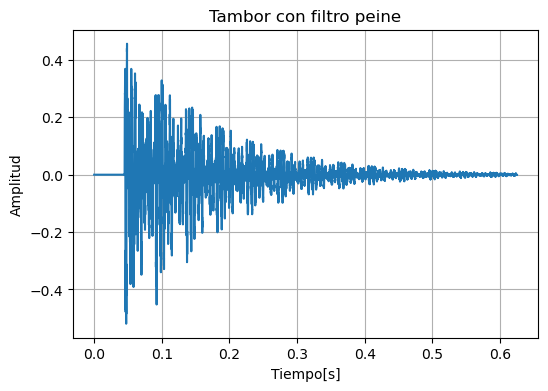

In [9]:
snare_rev = iircomb(snare, int(45e-3*fs), 0.7)
# snare_rev = 0.5*snare + 0.5*snare_comb
plot_sig(snare_rev[:30000], fs, title='Tambor con filtro peine', l=6, a=4)
ipd.Audio(snare_rev, rate=fs)

Puede apreciarse que el efecto obtenido es el de un flutter echo muy marcado. Por eso se dice que representa un modo del recinto, es decir, la onda sonora reflejandose entre dos paredes paralelas. No es este el efecto deseado. 

## Filtro Pasa-Todo
A continuación se filtra la misma señal con los mismos parámetros pero con un filtro pasa-todo.

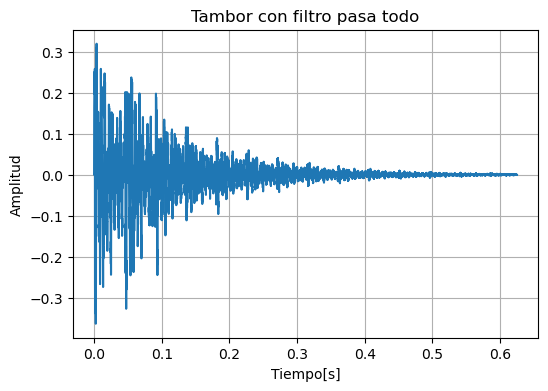

In [10]:
# plot_sig(snare, fs, title='Tambor')

snare_rev = allpass(snare, int(45e-3*fs), 0.7)
# snare_rev = 0*snare + 1*snare_comb
plot_sig(snare_rev[:30000], fs, title='Tambor con filtro pasa todo', l=6, a=4)
ipd.Audio(snare_rev, rate=fs)

Efectivamente el sonido logrado no es muy distinto del obtenido antes. Una posible explicación es que si bien la magnitud es constante, el retardo de grupo del IIR COMB y del ALLPASS son muy parecidos. Pero Schroeder diseñó una combinación de ambos que sí se empieza a parecer más a un recinto. 

## Primera implementación de Schroeder
El primer diseño de M. Schroeder consta de 5 pasa todo en cascada con los valores indicados. 
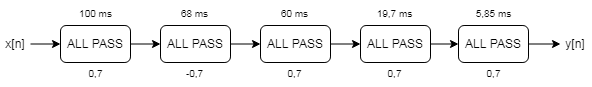

In [11]:
def schroeverb1(x,fs):
    gains = [.7, -0.7, .7, .7, .7]
    delays = np.array([100e-3, 68e-3, 60e-3, 19.7e-3, 5.85e-3])
    delays = delays*fs
    y = allpass(x, int(delays[0]), gains[0])
    for i in range(1, 5):
        y = allpass(y, int(delays[i]), gains[i])
    return y

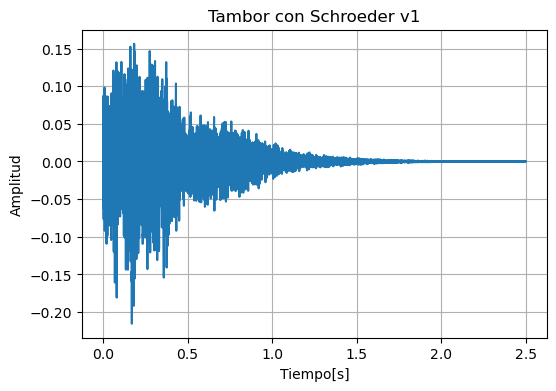

In [12]:
snare_rev = schroeverb1(snare, fs)
plot_sig(snare_rev, fs, 'Tambor con Schroeder v1', l=6, a=4)
ipd.Audio(snare_rev, rate=fs)

Puede apreciarse que las reflexiones son periódicas y no se logra el efecto deseado. 

## Segunda implementación de Schroeder
El segundo diseño propuesto por M. R. Schroeder consta de 4 filtros peine IIR en paralelo y dos filtros pasa-todo en cascada. Los parámetros utilizados se muestran en el siguiente diagrama:
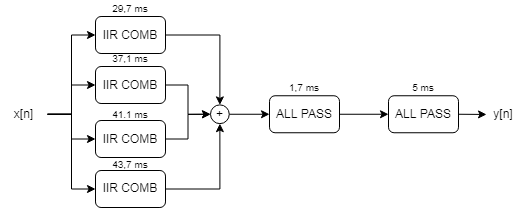

In [13]:
def schroeverb2(x, fs, gcomb, gallpass):
    '''
    Reverberador de Schroeder.
    Devuelve  una señal procesada con el reverberador de Schroeder, con su diseño clásico. Consta de
    4 filtros peine en paralelo y tiempos no correlacionados, y 2 pasa-todo en serie. 

    Parameters
    ----------
        x: array
        Señal de entrada
        
        fs: int
        Frecuencia de muestreo
    
        gcomb: float
        Ganancia de los filtros peine. Debe ser <1 para que el sistema sea estable.
    
        gallpass: float
        Ganancia de los pasa-todo. Debe ser <1 para que el sistema sea estable.

    Returns
    -------
        y: array
        Señal filtrada (100% wet)
    '''
    combdel = [int(29.7e-3*fs), int(37.1e-3*fs), int(41.1e-3*fs), int(43.7e-3*fs)]
    y1 = iircomb(x, combdel[0], gcomb)
    y2 = iircomb(x, combdel[1], gcomb)
    y3 = iircomb(x, combdel[2], gcomb)
    y4 = iircomb(x, combdel[3], gcomb)

    y = (y1 + y2 + y3 + y4) * .25
    
    y = allpass(y, int(5e-3*fs), gallpass)
    y = allpass(y, int(1.7e-3*fs), gallpass)
    return y#/np.max(np.abs(y))

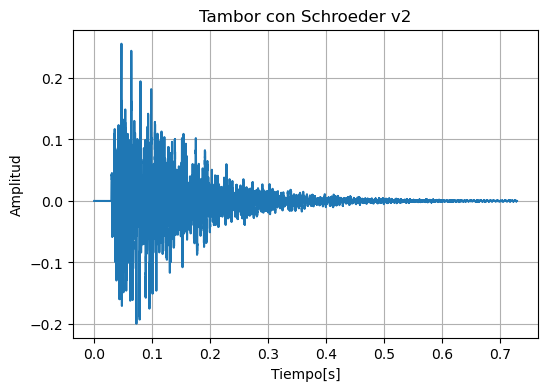

In [14]:
snare_rev = schroeverb2(snare, fs, 0.7, 0.7)
# snare_rev = 0.6*snare_rev + 0.4*snare
plot_sig(snare_rev[:35000], fs, 'Tambor con Schroeder v2', l=6, a=4)
ipd.Audio(snare_rev, rate=fs)

## Implementación modificada #1
En esta implemetnación se agrega la posibilidad de elegir una cantidad arbitraria de filtros peine en paralelo y de filtros pasa-todo en cascada. Además, los retardos para cada filtro se eligen con una variable aleatoria uniforme entre 35 y 50 ms para el filtro peine y 1,7 y 5 ms para el pasa-todo.


In [15]:
def schroeverb3(x, fs, CF, cfgain, AP, apgain):
    combsum = []
    for i in range(CF):
        cfdel = int(fs * np.random.uniform(35e-3, 50e-3))
        y = iircomb(x, cfdel, cfgain)
        combsum.append(y)
    y = np.sum(combsum, axis=0)/CF    # Output del bloque de combfilter
    
    for i in range(AP):
        apdel = int(fs * np.random.uniform(1.7e-3, 5e-3))
        y = allpass(y, apdel, apgain)
    return y


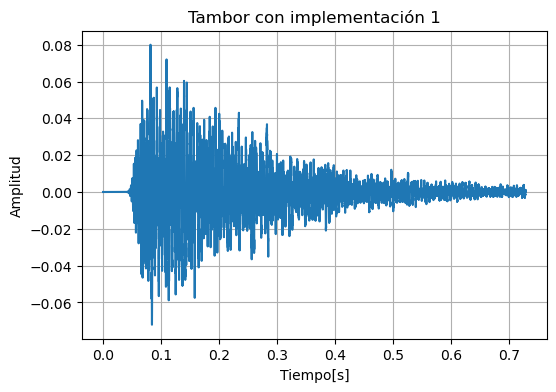

In [16]:
snare_rev = schroeverb3(snare, fs, 32, 0.8, 8, 0.3)
# snare_rev = 0.6*snare_rev + 0.4*snare
plot_sig(snare_rev[:35000], fs, 'Tambor con implementación 1', l=6, a=4)
ipd.Audio(snare_rev, rate=fs)

## Implementación modificada #2
Podría mejorarse el diseño incorporando un filtro pasa bajos a la salida de los filtros comb, de esta manera emulamos la absorción de la sala.
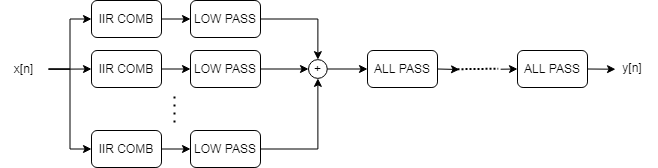

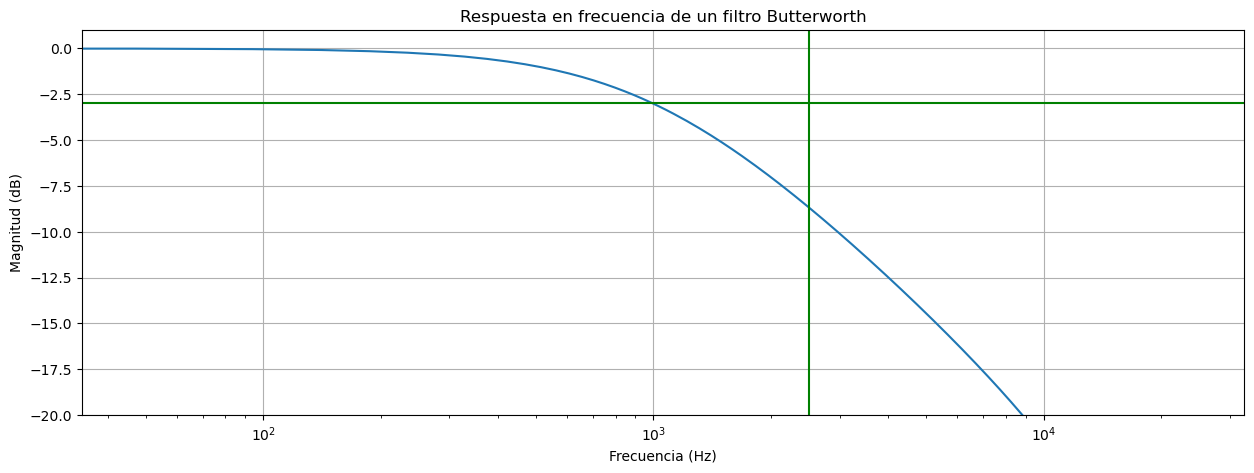

In [17]:
fc = 1000
b, a = sig.butter(1, fc, fs=fs)
w, H = sig.freqz(b, a, fs=fs)
H_mag = np.abs(H)
plt.figure(figsize=(15,5))
plt.semilogx(w, 20 * np.log10(H_mag))
plt.title('Respuesta en frecuencia de un filtro Butterworth')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.axvline(x = 2500, color='g')
plt.axhline(y = -3, color='g')
plt.ylim([-20,1])
plt.grid()
plt.show()



In [18]:
def schroeverb(x, fs, CF, cfgain, AP, apgain, fc=2500):
    combsum = []    # Lista en la cual se añaden los filtros peine
    B, A = sig.butter(1, fc, fs=fs)    # define coeficientes del filtro pasa bajos
    
    for i in range(CF):
        cfdel = int(fs * np.random.uniform(35e-3, 50e-3))    # Define la demora de forma aleatoria
        y = iircomb(x, cfdel, cfgain)    # Filtra la señal
        y = sig.lfilter(B, A, y)    # Filtro PB a la salida de cada filtro peine
        combsum.append(y)    # Añade la señal filtrada a la lista
    y = np.sum(combsum, axis=0)/CF    # Output del bloque de combfilter
#     y = sig.lfilter(B,A,y)    # Filtro PB una sola vez luego de sumar los filtros peine
    for i in range(AP):
        apdel = int(fs * np.random.uniform(1.7e-3, 5e-3))    # Define la demora de forma aleatoria
        y = allpass(y, apdel, apgain)    # Filtra la señal
    return y

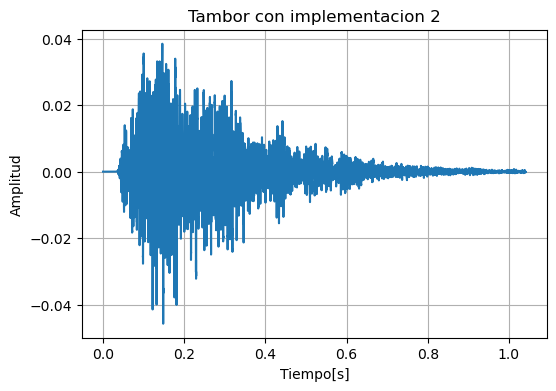

In [19]:
snare_rev = schroeverb(snare, fs, 64, 0.8, 16, 0.8, 4000)
snare_mix = snare_rev + 0.3*snare
plot_sig(snare_rev[:50000], fs, 'Tambor con implementacion 2', l=6, a=4)
ipd.Audio(snare_mix, rate=fs)